<a href="https://colab.research.google.com/github/Rkinbag/stocck-market-prediction/blob/main/Stock_Prediction_Using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [2]:
apple_stock_df = pd.read_csv("./apple_stock_prepared.csv")
apple_stock_df.head()

,volume,close_lag1,close_lag2,close_lag3,close_lag4,close_lag5,close_lag6,ma_3,rsi_3,ma_6,rsi_6,ma_9,rsi_9,ma_12,rsi_12,event,close
0,-0.464011,-0.767950,-0.747017,-0.739101,-0.639217,-0.669514,-0.646494,0.627785,-1.812133,4.368171,-1.830292,7.716514,-1.862736,8.506598,-1.880503,-0.456953,2.338571
1,-0.190969,-0.769480,-0.758587,-0.738967,-0.732728,-0.632766,-0.662760,-0.579982,-1.183392,1.505926,-1.592107,3.501353,-1.710687,5.255354,-1.767605,-0.456953,2.945714
2,-0.723175,-0.760056,-0.760125,-0.750631,-0.732592,-0.727153,-0.625758,-0.115027,-1.286573,0.152772,-1.626297,2.429129,-1.732050,4.553852,-1.782792,-0.456953,2.750000
3,-0.570132,-0.763094,-0.750650,-0.752182,-0.744357,-0.727016,-0.720797,-0.092085,-0.982726,-0.217920,-1.529132,1.347659,-1.674853,2.875177,-1.742103,-0.456953,2.941429
4,-0.692599,-0.760123,-0.753705,-0.742630,-0.745922,-0.738891,-0.720659,-0.694639,-0.034087,-0.992704,-1.141034,-0.009939,-1.444629,1.005462,-1.579137,-0.456953,3.678571


In [3]:
X = apple_stock_df[apple_stock_df.columns[0:-1]]
Y = apple_stock_df[apple_stock_df.columns[-1]]

In [4]:
from sklearn.model_selection import train_test_split


In [5]:
import random
random.seed(100)

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state = 100)


In [7]:
X_val, X_test, Y_val, Y_test = train_test_split(X_test,Y_test,test_size=0.5, random_state = 100)




In [8]:
X_train.shape


(156, 16)

In [9]:

X_test.shape

(20, 16)

In [10]:
X_val.shape

(20, 16)

In [11]:
def num_steps(length: int, batch_size: int):
    '''
    calculates number of steps from dataset and the batch size
    
    Parameters
    ----------
    
    length: the total length of the dataset
    batch_size: size of each batch
    
    Returns
    -------
    
    number_of_steps: number of steps per epoch
    
    '''
    return length//batch_size + 1

In [12]:
batch_size = 10
num_steps(len(X_train), batch_size)

16

In [13]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

In [15]:
def stock_predictor_model(x_train):
    '''
    Define the stock predictor model
    '''
    stock_predictor = Sequential()
    # One Dense layer with number of units same as features
    stock_predictor.add(Dense(10, input_dim=x_train.shape[1],
                    activation='relu',
                    kernel_initializer='he_normal'))
    stock_predictor.add(Dense(6, input_dim=10,
                    activation='relu',
                    kernel_initializer='he_normal'))
    stock_predictor.add(Dense(3, input_dim=6,
                activation='relu',
                kernel_initializer='he_normal'))
    # Final dense layer
    stock_predictor.add(Dense(1, activation='relu',
                    kernel_initializer='he_normal'))
    # Using mse as loss and mape as the metric
    stock_predictor.compile(loss='mean_squared_error',
                  optimizer='rmsprop',
                  metrics=['mape'])
    return stock_predictor

In [16]:
model = stock_predictor_model(X_train)


In [17]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                170       
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
 dense_2 (Dense)             (None, 3)                 21        
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


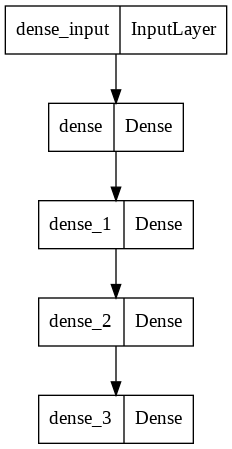

In [18]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

In [19]:

batch_size = 20
num_steps(len(X_train), batch_size)

8

In [20]:
history = model.fit(X_train, Y_train, 
                    validation_data=[X_val, Y_val],
                    batch_size=batch_size,
                    epochs=1000,
                    verbose=1)

Epoch 1/1000
8/8 [==============================] - 1s 35ms/step - loss: 4830.5557 - mape: 99.8303 - val_loss: 24471.5859 - val_mape: 99.8011
Epoch 2/1000
8/8 [==============================] - 0s 7ms/step - loss: 4827.5435 - mape: 99.6118 - val_loss: 24468.5391 - val_mape: 99.7019
Epoch 3/1000
8/8 [==============================] - 0s 5ms/step - loss: 4824.6978 - mape: 99.3996 - val_loss: 24461.9102 - val_mape: 99.4837
Epoch 4/1000
8/8 [==============================] - 0s 7ms/step - loss: 4819.4497 - mape: 99.0547 - val_loss: 24452.2852 - val_mape: 99.1402
Epoch 5/1000
8/8 [==============================] - 0s 6ms/step - loss: 4812.2847 - mape: 98.6127 - val_loss: 24435.0312 - val_mape: 98.7771
Epoch 6/1000
8/8 [==============================] - 0s 5ms/step - loss: 4805.0420 - mape: 98.1383 - val_loss: 24417.6836 - val_mape: 98.3589
Epoch 7/1000
8/8 [==============================] - 0s 5ms/step - loss: 4796.8652 - mape: 97.6267 - val_loss: 24399.5000 - val_mape: 97.8547
Epoch 8/1000

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
for key,value in history.history.items():
	print(key, ':', value)

loss : [4830.5556640625, 4827.54345703125, 4824.69775390625, 4819.44970703125, 4812.28466796875, 4805.0419921875, 4796.865234375, 4788.66943359375, 4780.51708984375, 4771.6396484375, 4762.23095703125, 4751.6728515625, 4740.7666015625, 4728.4990234375, 4715.19384765625, 4701.05908203125, 4684.9921875, 4667.61279296875, 4648.77490234375, 4628.53466796875, 4607.67431640625, 4585.400390625, 4561.02392578125, 4534.88037109375, 4507.2353515625, 4477.30712890625, 4446.01611328125, 4413.275390625, 4377.7666015625, 4339.66650390625, 4300.42041015625, 4258.56103515625, 4214.453125, 4166.9794921875, 4117.74365234375, 4066.978271484375, 4015.2255859375, 3961.283935546875, 3904.523681640625, 3843.66015625, 3783.273681640625, 3718.776123046875, 3651.222412109375, 3581.18310546875, 3507.25439453125, 3431.24560546875, 3350.56640625, 3267.22900390625, 3185.860107421875, 3102.25830078125, 3012.798583984375, 2921.08544921875, 2828.07373046875, 2733.30810546875, 2637.345458984375, 2541.37744140625, 2446.2

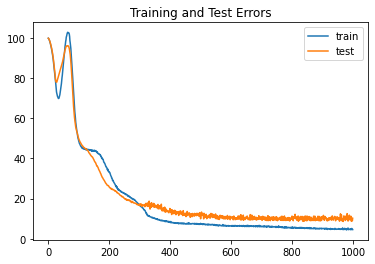

In [23]:
plt.plot(history.history['mape'], label='train')
plt.plot(history.history['val_mape'], label='test')
plt.legend()
plt.title("Training and Test Errors")
plt.show()

In [24]:
pip install talos

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 2.7 MB/s 
     |████████████████████████████████| 52 kB 1.1 MB/s 
     |████████████████████████████████| 5.4 MB 9.5 MB/s 
     |████████████████████████████████| 9.8 MB 44.0 MB/s 
     |████████████████████████████████| 2.6 MB 40.5 MB/s 
  Created wheel for chances: filename=chances-0.1.9-py3-none-any.whl size=41608 sha256=7085598edd815ea6949c04114d92e952f1ddeff12fef84d1d89a2f2743d3d7e2
  Stored in directory: /root/.cache/pip/wheels/f3/2e/7e/316f7da11ccf2195ff05e4a0186a4b5975be9bd0b0004198b6
Successfully built chances
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


# Hyperparameter tuning of neural network

In [25]:
import talos
from talos.model.hidden_layers import hidden_layers


In [26]:
p = {'lr': (0.1,0.5,10),
     'first_neuron':[10, 20],
     'hidden_layers':[1, 2, 3],
     'batch_size': (10,30,5),
     'epochs': [500],
     'dropout': (0, 0.5, 5),
     'shapes':['brick','funnel'],
      'activation': ['relu']
    }

In [27]:
def stock_prediction_model(x_train, y_train, x_val, y_val, params):

    # next we can build the model exactly like we would normally do it
    model = Sequential()
    model.add(Dense(params['first_neuron'], input_dim=x_train.shape[1],
                    activation='relu',
                    kernel_initializer='he_normal'))
    
    model.add(Dropout(params['dropout']))
    
    hidden_layers(model, params, 1)
   
    model.add(Dense(1, activation='relu',
                    kernel_initializer='he_normal'))
    
    model.compile(loss='mean_squared_error',
                  optimizer=RMSprop(learning_rate=params['lr']),
                  metrics=['mape'])
    
    history = model.fit(x_train, y_train, 
                        validation_data=[x_val, y_val],
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        verbose=0)
    
    return history, model

In [ ]:
t = talos.Scan(x=X_train,
            y=Y_train,x_val=X_val,y_val=Y_val,
            model=stock_prediction_model,
            params=p,
            experiment_name='stock_exp',
            fraction_limit=0.1)

In [ ]:
t.details

In [ ]:
analyze_object.plot_line('val_mean_absolute_percentage_error')


In [ ]:
analyze_object.plot_corr('val_mean_absolute_percentage_error', ['val_mean_absolute_percentage_error', 'loss', 'val_loss','mean_absolute_percentage_error'])


In [ ]:
best_model = t.best_model(metric='val_mean_absolute_percentage_error', asc=True)
best_model.summary()

In [ ]:
import numpy as np
from sklearn.utils import check_array

def mean_absolute_percentage_error(y_true, y_pred): 
   


    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(Y_test, best_model.predict(X_test)[:,-1])